In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as col
import matplotlib.cm as cm
import seaborn as sns
from sklearn.metrics import r2_score

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.smoker.replace(('yes', 'no'), (1, 0), inplace=True)
df.sex.replace(('male', 'female'), (1, 0), inplace=True)
df.region = pd.Categorical(df.region)
df['region'] = df.region.cat.codes

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<AxesSubplot:xlabel='age', ylabel='charges'>

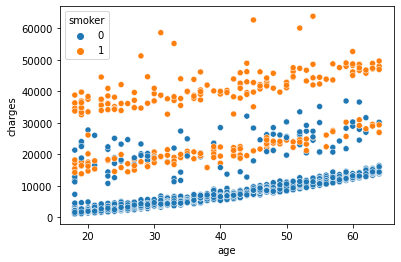

In [4]:
sns.scatterplot(df["age"],df["charges"], data=df, hue='smoker')

<AxesSubplot:xlabel='bmi', ylabel='charges'>

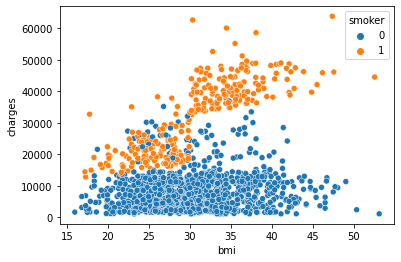

In [5]:
sns.scatterplot(df["bmi"],df["charges"], data=df, hue='smoker')

In [9]:
from sklearn.preprocessing import PolynomialFeatures

# linear_reg = LinearRegression()
multiple_linear_reg = LinearRegression()
#Multiply Linear Regression
x = df.drop(["charges"],axis=1)
y = df["charges"]

pol = PolynomialFeatures(degree = 2)
x_pol = pol.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Pol_reg = LinearRegression()
Pol_reg.fit(X_train, y_train)

print(Pol_reg.score(X_test, y_test))
print(Pol_reg.score(X_train, y_train))

0.746173465822659
0.7517121720421303


In [10]:
y_test_pred = Pol_reg.predict(X_test)
df = pd.DataFrame({'Stock': y_test, 'Predicted': y_test_pred})
df

,Stock,Predicted
929,6289.75490,9673.383696
121,1705.62450,415.620864
1119,5693.43050,3657.829235
675,7222.78625,6145.639298
471,2203.47185,2855.488407
...,...,...
1013,8765.24900,11161.812610
70,16577.77950,26293.708073
472,1744.46500,1943.833170
1078,34672.14720,28647.870906


<AxesSubplot:xlabel='Stock', ylabel='Predicted'>

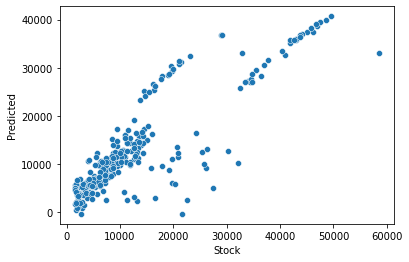

In [11]:
sns.scatterplot(data=df, x='Stock', y='Predicted')

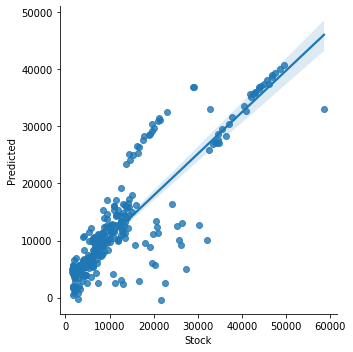

In [12]:
sns.lmplot(data=df, x='Stock', y='Predicted')